# Python TFM Section

## Modelling I
1. Compare several models and use the most suitable for this case of study
2. Train and Test the final model and set it up implemented
3. Final conclusions

In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
%pylab inline
plt.style.use('ggplot')
from pathlib import Path
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_modelize = pd.read_csv(Path.cwd() / 'Outputs' / 'DF_MODELIZE.csv', sep = ';', header = 0 , encoding = "ISO-8859-1",decimal=',')
df_modelize.head(5)

,VERSION,ID_UPR,ID_TECNOLOGIA,A. No Cobrados,AMONIACO,ATR,Ajuste,BONO_SOCIAL_PEGO,Banda,Bilateral,...,Res. Pot. Adicional,S. Regulacion,S. Res. Pot. Adicional,SERV_GEST_RES,TASAS_MEDIOAMB,TASA_ARAGON,Terciaria,UREA,VCF,POWER_MWH
0,201701,UPR115,NC,NaN,NaN,NaN,NaN,NaN,NaN,81778497.0,...,NaN,NaN,-36.0,-5156083.0,NaN,NaN,NaN,NaN,NaN,1111803.766
1,201701,UPR116,NC,NaN,NaN,NaN,NaN,NaN,NaN,68455391.0,...,NaN,NaN,NaN,-4357224.0,NaN,NaN,NaN,NaN,NaN,940091.558
2,201701,UPR1198,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-192.0,NaN,NaN,NaN,NaN,NaN,NaN,-1418.032
3,201701,UPR1205,EB,NaN,NaN,NaN,-124366.0,NaN,NaN,1578792.0,...,NaN,NaN,-455.0,NaN,-33711.0,NaN,55144.0,NaN,NaN,22830.702
4,201701,UPR1206,BX,NaN,NaN,NaN,-9972.0,NaN,NaN,NaN,...,NaN,NaN,-7.0,NaN,-16346.0,NaN,NaN,NaN,NaN,-418.593


Before aplying any model:

1. All NaNs are now filled with 0s 
2. I will create a synthetic column named INTEGRAL_MARGIN with the sum of all the euros 
3. I will inspect the graphical aspect of the data
4. After watching it, I decided to drop all the outliers of every column and watch it again

In [3]:
df_modelize = df_modelize.fillna(0)

df_modelize['INTEGRAL_MARGIN']  = \
df_modelize['A. No Cobrados'] + \
df_modelize['AMONIACO'] + \
df_modelize['ATR'] + \
df_modelize['Ajuste'] + \
df_modelize['BONO_SOCIAL_PEGO'] + \
df_modelize['Banda'] + \
df_modelize['Bilateral'] + \
df_modelize['CALIZAS'] + \
df_modelize['CANON HID'] + \
df_modelize['CANON_CONCESION'] + \
df_modelize['CANON_HID_CATALUÃÂA'] + \
df_modelize['CANON_NC_CATALUÃÂA'] + \
df_modelize['CANON_NC_EST'] + \
df_modelize['CENTIMO_VERDE'] + \
df_modelize['COSTE_COMBUSTIBLE'] + \
df_modelize['D. Medida Contador'] + \
df_modelize['G. Desvios'] + \
df_modelize['G. Potencia LP'] + \
df_modelize['G. Potencia MP'] + \
df_modelize['I. G. DesvÃ­os y Terciaria'] + \
df_modelize['I. R. Cobertura'] +  \
df_modelize['I. Res. Pot. Adicional'] + \
df_modelize['IMPUESTO ELECT'] + \
df_modelize['LUBRICANTES'] + \
df_modelize['M. Diario'] + \
df_modelize['M. Intradiario Continuo'] + \
df_modelize['M. Intradiarios'] + \
df_modelize['OTROS'] + \
df_modelize['PEAJE GEN'] +  \
df_modelize['R. Cobertura'] + \
df_modelize['R. Secundaria'] + \
df_modelize['RELIQ_CANON_NC_CATALUÃÂA'] +  \
df_modelize['Redespachos'] + \
df_modelize['Res. Pot. Adicional'] +  \
df_modelize['S. Regulacion'] + \
df_modelize['S. Res. Pot. Adicional'] + \
df_modelize['SERV_GEST_RES'] + \
df_modelize['TASAS_MEDIOAMB'] + \
df_modelize['TASA_ARAGON'] + \
df_modelize['Terciaria'] + \
df_modelize['VCF'] 

df_modelize.head(10)

,VERSION,ID_UPR,ID_TECNOLOGIA,A. No Cobrados,AMONIACO,ATR,Ajuste,BONO_SOCIAL_PEGO,Banda,Bilateral,...,S. Regulacion,S. Res. Pot. Adicional,SERV_GEST_RES,TASAS_MEDIOAMB,TASA_ARAGON,Terciaria,UREA,VCF,POWER_MWH,INTEGRAL_MARGIN
0,201701,UPR115,NC,0.0,0.0,0.0,0.0,0.0,0.0,81778497.0,...,0.0,-36.0,-5156083.0,0.0,0.0,0.0,0.0,0.0,1111803.766,68991367.0
1,201701,UPR116,NC,0.0,0.0,0.0,0.0,0.0,0.0,68455391.0,...,0.0,0.0,-4357224.0,0.0,0.0,0.0,0.0,0.0,940091.558,57329124.0
2,201701,UPR1198,NC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-192.0,0.0,0.0,0.0,0.0,0.0,0.0,-1418.032,-35497.0
3,201701,UPR1205,EB,0.0,0.0,0.0,-124366.0,0.0,0.0,1578792.0,...,0.0,-455.0,0.0,-33711.0,0.0,55144.0,0.0,0.0,22830.702,1628652.0
4,201701,UPR1206,BX,0.0,0.0,0.0,-9972.0,0.0,0.0,0.0,...,0.0,-7.0,0.0,-16346.0,0.0,0.0,0.0,0.0,-418.593,-40860.0
5,201701,UPR1207,EB,0.0,0.0,0.0,-198314.0,0.0,15066.0,59653.0,...,0.0,-807.0,0.0,-1528.0,0.0,225821.0,0.0,999.0,11909.436,1165056.0
6,201701,UPR1314,BP,0.0,0.0,0.0,-429377.0,0.0,0.0,-118383.0,...,0.0,-39.0,0.0,0.0,0.0,-24031.0,0.0,0.0,-13631.195,-687111.0
7,201701,UPR1315,BP,0.0,0.0,0.0,-506708.0,0.0,2001.0,0.0,...,0.0,-397.0,0.0,0.0,0.0,441646.0,0.0,-162.0,10253.552,933419.0
8,201701,UPR160,GN,-994654.0,0.0,-938689.0,0.0,0.0,1045907.0,0.0,...,0.0,-2223.0,0.0,0.0,0.0,251416.0,0.0,-14892.0,84359.878,5616333.0
9,201701,UPR162,GN,-418200.0,0.0,-507356.0,0.0,0.0,957825.0,0.0,...,0.0,-316.0,0.0,0.0,0.0,573346.0,0.0,-17674.0,109060.598,13326546.0


In [4]:
df_modelize2 = df_modelize[['ID_TECNOLOGIA','POWER_MWH','INTEGRAL_MARGIN']]
df_tech= df_modelize2[['ID_TECNOLOGIA']].drop_duplicates()
df_tech['NUM_TECH']= [1,2,3,4,5,6,7,8]
df_tech.reset_index
df_modelize2 = pd.merge(df_modelize2, df_tech, on=['ID_TECNOLOGIA'], how='left')
df_modelize2 = df_modelize2[['POWER_MWH','INTEGRAL_MARGIN','NUM_TECH']]


df_modelize2.sort_values('INTEGRAL_MARGIN').tail(5)

,POWER_MWH,INTEGRAL_MARGIN,NUM_TECH
872,25252754.63,1.786557e+09,1
1000,30433835.04,1.852227e+09,1
828,29264447.52,1.863768e+09,1
913,32620485.17,2.102639e+09,1
871,29867406.09,2.108922e+09,1


I represent all the data graphically for watching the distribution and see how prone to be clustered those centrals are. 

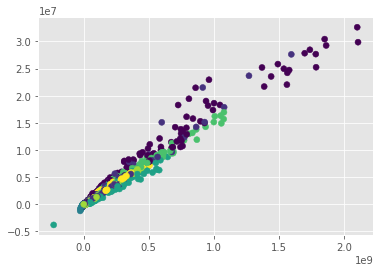

In [5]:
plt.scatter(df_modelize2['INTEGRAL_MARGIN'],df_modelize2['POWER_MWH'],c=df_modelize2['NUM_TECH'])

I discard the outliers which are bigger than 2 times the standard desviation, that means keeping the percentile 95 of every data.

I used directly the fuction zcore from stats to have the calcule directly instead of using the mean and the standard deviation.

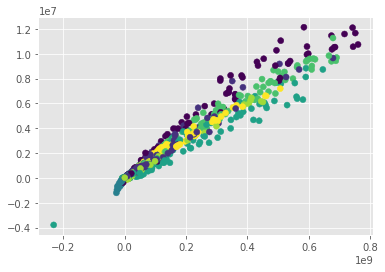

In [6]:
from scipy import stats
df_modelize3= df_modelize2[(np.abs(stats.zscore(df_modelize2)) < 2).all(axis=1)].reset_index()
plt.scatter(df_modelize3['INTEGRAL_MARGIN'],df_modelize3['POWER_MWH'],c=df_modelize3['NUM_TECH'])

There are still some values too low that I don't want to take into account , so I will drop it manually

In [7]:
df_modelize3.sort_values('INTEGRAL_MARGIN').head(3)

,index,POWER_MWH,INTEGRAL_MARGIN,NUM_TECH
761,784,-3789073.00,-230711843.0,5
610,623,-1206169.48,-26556006.0,4
650,666,-968546.08,-24686687.0,4


In [8]:
df_modelize3=df_modelize3.drop(df_modelize3.index[761])

In [9]:
df_modelize3.sort_values('INTEGRAL_MARGIN').head(3)

,index,POWER_MWH,INTEGRAL_MARGIN,NUM_TECH
610,623,-1206169.480,-26556006.0,4
650,666,-968546.080,-24686687.0,4
509,513,-682677.543,-23179375.0,4


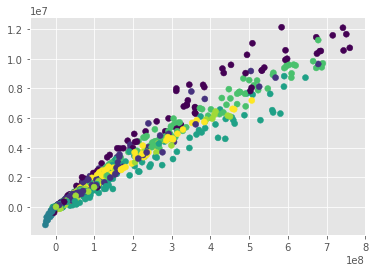

In [10]:
plt.scatter(df_modelize3['INTEGRAL_MARGIN'],df_modelize3['POWER_MWH'],c=df_modelize3['NUM_TECH'])

From this representation, seems clear than the behaviour of the different technologies is pretty similar when at first I supposed it won't... Let's go look for the meaning of this

1. I apply a matrix correlation to see how much weight does the differnt costs and profits to the integral margin
2. We see that the profits are extremely hight against the costs.
    - Since every technology is sold with the same price in the electric market no matter what are it's implied costs, the profits columns does not really matter in the proces of predicting 
3. We recalculate now the margin but only with the costs-part selected (without: Bilateral , M. Diario , R. Cobertura , M.Intradiarios




                             VERSION  A. No Cobrados  AMONIACO       ATR  \
VERSION                     1.000000        0.020186 -0.062207 -0.077740   
A. No Cobrados              0.020186        1.000000 -0.000212 -0.072734   
AMONIACO                   -0.062207       -0.000212  1.000000 -0.052883   
ATR                        -0.077740       -0.072734 -0.052883  1.000000   
Ajuste                     -0.112995       -0.004622  0.125565 -0.105980   
BONO_SOCIAL_PEGO           -0.041916       -0.000480 -0.045029  0.456660   
Banda                       0.179281       -0.002619 -0.152812 -0.464028   
Bilateral                   0.189340        0.000983  0.041376  0.091215   
CALIZAS                    -0.083343        0.000023  0.441714 -0.064592   
CANON HID                  -0.072172       -0.000452 -0.042318 -0.053855   
CANON_CONCESION            -0.099276       -0.000235 -0.020024 -0.027572   
CANON_HID_CATALUÃÂA      -0.050004       -0.000121 -0.011361 -0.014458   
CANON_NC_CAT

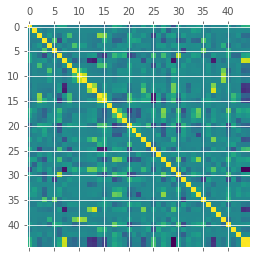

In [11]:
print(df_modelize.corr())
plt.matshow(df_modelize.corr())
plt.show()

I will repeat the whole previous process altogether for having the new distribution of costs for technologie

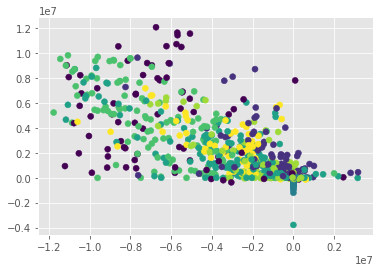

In [12]:
df_modelize4 = df_modelize
# df_modelize4 = df_modelize.drop(columns=['INTEGRAL_MARGIN', 
#                                          'Bilateral' , 
#                                          'M. Diario' , 
#                                          'R. Cobertura' , 
#                                          'M. Intradiarios'])

df_modelize4['INTEGRAL_COSTS']  = \
df_modelize4['AMONIACO'] + \
df_modelize4['ATR'] + \
df_modelize4['BONO_SOCIAL_PEGO'] + \
df_modelize4['CALIZAS'] + \
df_modelize4['CANON HID'] + \
df_modelize4['CANON_CONCESION'] + \
df_modelize4['CANON_HID_CATALUÃÂA'] + \
df_modelize4['CANON_NC_CATALUÃÂA'] + \
df_modelize4['CANON_NC_EST'] + \
df_modelize4['CENTIMO_VERDE'] + \
df_modelize4['COSTE_COMBUSTIBLE'] + \
df_modelize4['IMPUESTO ELECT'] + \
df_modelize4['LUBRICANTES'] + \
df_modelize4['OTROS'] + \
df_modelize4['PEAJE GEN'] +  \
df_modelize4['RELIQ_CANON_NC_CATALUÃÂA'] +  \
df_modelize4['SERV_GEST_RES'] + \
df_modelize4['TASAS_MEDIOAMB'] + \
df_modelize4['TASA_ARAGON'] 



df_modelize5 = df_modelize4[['VERSION','ID_TECNOLOGIA','POWER_MWH','INTEGRAL_COSTS']]
df_modelize5 = pd.merge(df_modelize5, df_tech, on=['ID_TECNOLOGIA'], how='left')
# df_modelize5['UNITARY_COST'] = df_modelize4['INTEGRAL_COSTS'] / df_modelize4['POWER_MWH']
df_modelize5 = df_modelize5[['VERSION','POWER_MWH','INTEGRAL_COSTS','NUM_TECH']]

df_modelize5= df_modelize5[(np.abs(stats.zscore(df_modelize5)) < 2).all(axis=1)].reset_index()
plt.scatter(df_modelize5['INTEGRAL_COSTS'],df_modelize5['POWER_MWH'],c=df_modelize5['NUM_TECH'])


In [13]:
df_modelize5.shape

(962, 5)

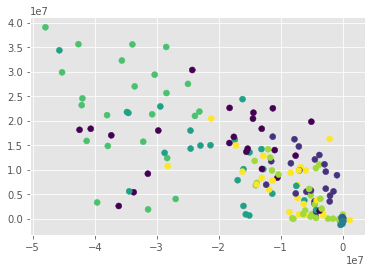

In [14]:
df_modelize5 = df_modelize5[['VERSION','POWER_MWH','INTEGRAL_COSTS','NUM_TECH']].groupby(['VERSION','NUM_TECH']).sum().reset_index()
plt.scatter(df_modelize5['INTEGRAL_COSTS'],df_modelize5['POWER_MWH'],c=df_modelize5['NUM_TECH'])


In [15]:
df_modelize5.head(5)

,VERSION,NUM_TECH,POWER_MWH,INTEGRAL_COSTS
0,201701,1,2568669.219,-36123064.0
1,201701,2,531012.714,-4361223.0
2,201701,3,-2270.452,-21771.0
3,201701,4,-18717.717,-233051.0
4,201701,5,629189.278,-15057305.0


In [16]:
df_modelize5.head(2)

,VERSION,NUM_TECH,POWER_MWH,INTEGRAL_COSTS
0,201701,1,2568669.219,-36123064.0
1,201701,2,531012.714,-4361223.0


# Model Aplication

First, I proceed to separate the data frame into Train-Test parts

For that, I divide the original df into two parts with the inputs on the matrix X and the  outputs desired on the matrix y
and the metric used for the evaluation at first will be MAE

## Instances Creation

In [17]:
# Import Library
from sklearn.model_selection import train_test_split

X = df_modelize5[['VERSION','NUM_TECH','POWER_MWH']]
y = df_modelize5['INTEGRAL_COSTS']


# Create Instance
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10 , random_state = 42)

## First aproach: Linear Regressor

In [18]:
# Load the library
from sklearn.linear_model import LinearRegression
# Create an instance of the model
regL = LinearRegression()
# Fit the regressor
regL.fit(X_train,y_train)
# Do predictions
y_regL_pred = regL.predict(X_test)

Let's check the mean absolute error as well as the distribution of the diferences between the test and the predictions

5796815.755649472
Mean error represents  -49 % from the mean value


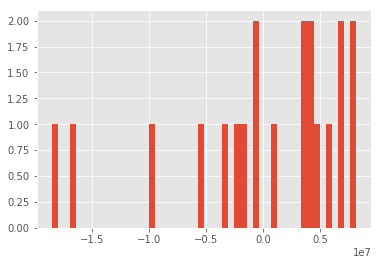

In [19]:
print(np.mean(np.abs(y_test-y_regL_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regL_pred))/df_modelize5['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regL_pred,bins=50);

## Second Aproach: KNeighbors

In [20]:
# Load the library
from sklearn.neighbors import KNeighborsRegressor
# Create an instance
regKN = KNeighborsRegressor(n_neighbors=15)
# Fit the data
regKN.fit(X_train,y_train)
# Do predictions
y_regKN_pred = regKN.predict(X_test)

6613326.290000001
Mean error represents  -56 % from the mean value


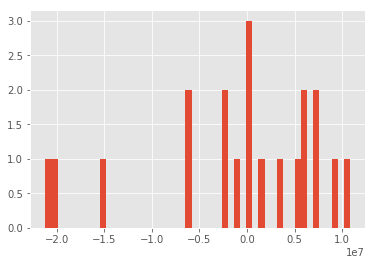

In [21]:
print(np.mean(np.abs(y_test-y_regKN_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regKN_pred))/df_modelize5['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regKN_pred,bins=50);

Now, I will apply a GridSearchCV to see how this could be improved

In [22]:
# Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Create instance
regGsCvKN = GridSearchCV(KNeighborsRegressor(),
                  param_grid = {"n_neighbors":np.arange(3,50)},
                  cv=5,
                  scoring="neg_mean_absolute_error",
                  verbose=9)
                     
                      
# Fit will test all of the combinations
regGsCvKN.fit(X,y)


print(regGsCvKN.best_params_)
print(regGsCvKN.best_score_)

Fitting 5 folds for each of 47 candidates, totalling 235 fits
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=-7683110.589743591, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=-7540603.042735042, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=-6029110.587719299, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=-6079914.964912281, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=3, score=-6149029.140350876, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .......... n_neighbors=4, score=-7864710.948717949, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=7 ...................................................
[CV] .......... n_neighbors=7, score=-5946631.518796992, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] .......... n_neighbors=8, score=-7985518.721153846, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] .......... n_neighbors=8, score=-6907123.118589744, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] .......... n_neighbors=8, score=-5415852.154605263, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] .......... n_neighbors=8, score=-5776897.730263158, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] ........... n_neighbors=8, score=-5921457.72368421, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .......... n_neighbors=9, score=-7949720.188034187, total=   0.0s
[CV] 

[CV] ......... n_neighbors=22, score=-6375234.889277388, total=   0.0s
[CV] n_neighbors=22 ..................................................
[CV] ........ n_neighbors=22, score=-5105517.1471291855, total=   0.0s
[CV] n_neighbors=22 ..................................................
[CV] ......... n_neighbors=22, score=-5396875.572966509, total=   0.0s
[CV] n_neighbors=22 ..................................................
[CV] ......... n_neighbors=22, score=-5632002.222488038, total=   0.0s
[CV] n_neighbors=23 ..................................................
[CV] ......... n_neighbors=23, score=-8098218.340022297, total=   0.0s
[CV] n_neighbors=23 ..................................................
[CV] ......... n_neighbors=23, score=-6343135.441471571, total=   0.0s
[CV] n_neighbors=23 ..................................................
[CV] ......... n_neighbors=23, score=-5044255.979405035, total=   0.0s
[CV] n_neighbors=23 ..................................................
[CV] .

[CV] .......... n_neighbors=36, score=-5505048.81140351, total=   0.0s
[CV] n_neighbors=37 ..................................................
[CV] ......... n_neighbors=37, score=-8339785.671517672, total=   0.0s
[CV] n_neighbors=37 ..................................................
[CV] .......... n_neighbors=37, score=-6273950.29036729, total=   0.0s
[CV] n_neighbors=37 ..................................................
[CV] ......... n_neighbors=37, score=-5436251.502133713, total=   0.0s
[CV] n_neighbors=37 ..................................................
[CV] ......... n_neighbors=37, score=-5048113.945945946, total=   0.0s
[CV] n_neighbors=37 ..................................................
[CV] ......... n_neighbors=37, score=-5536461.738264579, total=   0.0s
[CV] n_neighbors=38 ..................................................
[CV] ......... n_neighbors=38, score=-8329548.058704454, total=   0.0s
[CV] n_neighbors=38 ..................................................
[CV] .

[CV] ......... n_neighbors=48, score=-5334120.479714912, total=   0.0s
[CV] n_neighbors=48 ..................................................
[CV] ......... n_neighbors=48, score=-5911617.627192982, total=   0.0s
[CV] n_neighbors=49 ..................................................
[CV] ......... n_neighbors=49, score=-8634539.125588696, total=   0.0s
[CV] n_neighbors=49 ..................................................
[CV] ......... n_neighbors=49, score=-6283619.161695446, total=   0.0s
[CV] n_neighbors=49 ..................................................
[CV] ......... n_neighbors=49, score=-5588409.114930183, total=   0.0s
[CV] n_neighbors=49 ..................................................
[CV] ......... n_neighbors=49, score=-5398583.499462943, total=   0.0s
[CV] n_neighbors=49 ..................................................
[CV] .......... n_neighbors=49, score=-6007490.04726101, total=   0.0s
{'n_neighbors': 24}
-6023648.698784723


[Parallel(n_jobs=1)]: Done 235 out of 235 | elapsed:    1.9s finished
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
regGsKN = regGsCvKN.best_estimator_

In [24]:
# Do predictions
y_regGsKN_pred = regGsKN.predict(X_test)

6555530.54375
Mean error represents  -56 % from the mean value


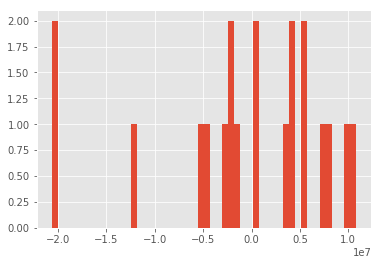

In [25]:
print(np.mean(np.abs(y_test-y_regGsKN_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regGsKN_pred))/df_modelize5['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regGsKN_pred,bins=50);

## Third: Decision Trees

In [26]:
# Load the library
from sklearn.tree import DecisionTreeRegressor
# Create an instance
regDT = DecisionTreeRegressor(max_depth=10)
# Fit the data
regDT.fit(X_train,y_train)
# Do predictions
y_regDT_pred = regDT.predict(X_test)

8031674.576785713
Mean error represents  -68 % from the mean value


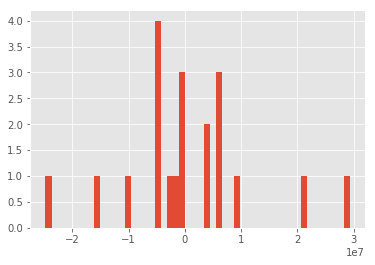

In [27]:
print(np.mean(np.abs(y_test-y_regDT_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regDT_pred))/df_modelize5['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regDT_pred,bins=50);

In [28]:
# Import Library
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create instance
regRF = GridSearchCV(RandomForestRegressor(n_jobs=-1),
                  param_grid = {"min_samples_leaf":np.arange(1,10),
                               "max_depth":np.arange(2,5),
                               "n_estimators":[100,150,200]},
                  cv=5,
                  scoring="neg_mean_absolute_error",
                  verbose=9)
                     
                     
# Fit will test all of the combinations
regRF.fit(X_train,y_train)


print(regRF.best_params_)
print(regRF.best_score_)

regRFF = regRF.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] max_depth=2, min_samples_leaf=1, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=100, score=-4978893.911068608, total=   2.9s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=100, score=-4449296.287987731, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=100, score=-6238720.740649125, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=100, score=-7217614.182704382, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.2s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=100, score=-5220093.900368356, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=150 ...............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=150, score=-4980442.438837948, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=150 ...............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=150, score=-4504283.119175133, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=150 ...............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.3s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=150, score=-6176372.667960809, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=150 ...............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.7s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=1, n_estimators=150, score=-7183753.308237267, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=150 ...............
[CV]  max_depth=2, min_samples_leaf=1, n_estimators=150, score=-5242633.898141618, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=200 ...............
[CV]  max_depth=2, min_samples_leaf=1, n_estimators=200, score=-4903231.713502611, total=   0.3s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=200 ...............
[CV]  max_depth=2, min_samples_leaf=1, n_estimators=200, score=-4519427.742056976, total=   0.3s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=200 ...............
[CV]  max_depth=2, min_samples_leaf=1, n_estimators=200, score=-6226679.842103682, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=200 ...............
[CV]  max_depth=2, min_samples_leaf=1, n_estimators=200, score=-7108630.029908619, total=   0.2s
[CV] max_depth=2, min_samples_leaf=1, n_estimators=200 ........

[CV]  max_depth=2, min_samples_leaf=4, n_estimators=200, score=-6100217.410774149, total=   0.3s
[CV] max_depth=2, min_samples_leaf=4, n_estimators=200 ...............
[CV]  max_depth=2, min_samples_leaf=4, n_estimators=200, score=-7124019.135855389, total=   0.2s
[CV] max_depth=2, min_samples_leaf=4, n_estimators=200 ...............
[CV]  max_depth=2, min_samples_leaf=4, n_estimators=200, score=-5303106.811499, total=   0.4s
[CV] max_depth=2, min_samples_leaf=5, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=5, n_estimators=100, score=-4799486.958017055, total=   0.2s
[CV] max_depth=2, min_samples_leaf=5, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=5, n_estimators=100, score=-4443741.490468355, total=   0.2s
[CV] max_depth=2, min_samples_leaf=5, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=5, n_estimators=100, score=-6207226.65470013, total=   0.1s
[CV] max_depth=2, min_samples_leaf=5, n_estimators=100 ............

[CV]  max_depth=2, min_samples_leaf=8, n_estimators=100, score=-4479150.439998717, total=   0.3s
[CV] max_depth=2, min_samples_leaf=8, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=8, n_estimators=100, score=-6088731.428361188, total=   0.3s
[CV] max_depth=2, min_samples_leaf=8, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=8, n_estimators=100, score=-7246355.398059682, total=   0.3s
[CV] max_depth=2, min_samples_leaf=8, n_estimators=100 ...............
[CV]  max_depth=2, min_samples_leaf=8, n_estimators=100, score=-5212639.556212519, total=   0.2s
[CV] max_depth=2, min_samples_leaf=8, n_estimators=150 ...............
[CV]  max_depth=2, min_samples_leaf=8, n_estimators=150, score=-4845065.824639961, total=   0.3s
[CV] max_depth=2, min_samples_leaf=8, n_estimators=150 ...............
[CV]  max_depth=2, min_samples_leaf=8, n_estimators=150, score=-4458357.19893949, total=   0.2s
[CV] max_depth=2, min_samples_leaf=8, n_estimators=150 .........

[CV]  max_depth=3, min_samples_leaf=2, n_estimators=150, score=-3922282.054869959, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=150 ...............
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=150, score=-4278849.022499245, total=   0.3s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=150 ...............
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=150, score=-5536327.721805009, total=   0.2s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=150 ...............
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=150, score=-6599032.800596895, total=   0.3s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=150 ...............
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=150, score=-4996648.323230841, total=   0.3s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=200 ...............
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=200, score=-3927000.500902959, total=   0.4s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=200 ........

[CV]  max_depth=3, min_samples_leaf=5, n_estimators=150, score=-5056310.601661287, total=   0.3s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=200 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=200, score=-3965168.6641330738, total=   0.5s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=200 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=200, score=-4334820.433249647, total=   0.3s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=200 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=200, score=-5897894.854662208, total=   0.3s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=200 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=200, score=-6900847.963669993, total=   0.4s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=200 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=200, score=-5001413.898564989, total=   0.3s
[CV] max_depth=3, min_samples_leaf=6, n_estimators=100 .......

[CV]  max_depth=3, min_samples_leaf=8, n_estimators=200, score=-7115043.161352404, total=   0.3s
[CV] max_depth=3, min_samples_leaf=8, n_estimators=200 ...............
[CV]  max_depth=3, min_samples_leaf=8, n_estimators=200, score=-4953390.095540595, total=   0.4s
[CV] max_depth=3, min_samples_leaf=9, n_estimators=100 ...............
[CV]  max_depth=3, min_samples_leaf=9, n_estimators=100, score=-4184749.8887810833, total=   0.2s
[CV] max_depth=3, min_samples_leaf=9, n_estimators=100 ...............
[CV]  max_depth=3, min_samples_leaf=9, n_estimators=100, score=-4485664.210060352, total=   0.3s
[CV] max_depth=3, min_samples_leaf=9, n_estimators=100 ...............
[CV]  max_depth=3, min_samples_leaf=9, n_estimators=100, score=-5970084.317139684, total=   0.2s
[CV] max_depth=3, min_samples_leaf=9, n_estimators=100 ...............
[CV]  max_depth=3, min_samples_leaf=9, n_estimators=100, score=-7169666.493039653, total=   0.2s
[CV] max_depth=3, min_samples_leaf=9, n_estimators=100 .......

[CV]  max_depth=4, min_samples_leaf=3, n_estimators=100, score=-4955702.867766628, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=100, score=-5907705.846488804, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=100, score=-5715650.967736688, total=   0.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=150 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=150, score=-3637969.033327233, total=   0.3s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=150 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=150, score=-3907701.066444478, total=   0.3s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=150 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=150, score=-5095770.780184718, total=   0.3s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=150 ........

[CV]  max_depth=4, min_samples_leaf=6, n_estimators=150, score=-4168954.160833863, total=   0.2s
[CV] max_depth=4, min_samples_leaf=6, n_estimators=150 ...............
[CV]  max_depth=4, min_samples_leaf=6, n_estimators=150, score=-5394887.687192219, total=   0.2s
[CV] max_depth=4, min_samples_leaf=6, n_estimators=150 ...............
[CV]  max_depth=4, min_samples_leaf=6, n_estimators=150, score=-6492567.452198868, total=   0.3s
[CV] max_depth=4, min_samples_leaf=6, n_estimators=150 ...............
[CV]  max_depth=4, min_samples_leaf=6, n_estimators=150, score=-5214211.893568469, total=   0.3s
[CV] max_depth=4, min_samples_leaf=6, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=6, n_estimators=200, score=-3843416.753687811, total=   0.3s
[CV] max_depth=4, min_samples_leaf=6, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=6, n_estimators=200, score=-4286093.846869254, total=   0.3s
[CV] max_depth=4, min_samples_leaf=6, n_estimators=200 ........

[CV]  max_depth=4, min_samples_leaf=9, n_estimators=200, score=-4149426.2672557123, total=   0.3s
[CV] max_depth=4, min_samples_leaf=9, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=9, n_estimators=200, score=-4695540.173125024, total=   0.3s
[CV] max_depth=4, min_samples_leaf=9, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=9, n_estimators=200, score=-5689306.909794416, total=   0.4s
[CV] max_depth=4, min_samples_leaf=9, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=9, n_estimators=200, score=-6946756.956651572, total=   0.3s
[CV] max_depth=4, min_samples_leaf=9, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=9, n_estimators=200, score=-5041963.229028834, total=   0.2s


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  3.4min finished
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 150}
-4624381.440095714


In [29]:
# Do predictions
y_regRFF_pred = regRFF.predict(X_test)

5724812.422325524
Mean error represents  -49 % from the mean value


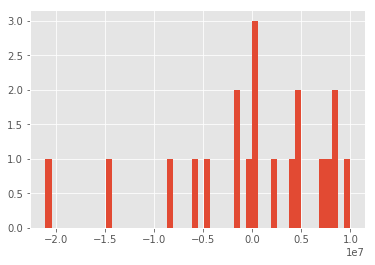

In [30]:
print(np.mean(np.abs(y_test-y_regRFF_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regRFF_pred))/df_modelize5['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regRFF_pred,bins=50);

## Fourth and Last (I hope): Support Vector Machine Regression

In [31]:
# Load the library
from sklearn.svm import SVR
# Create an instance
regSVR = SVR(kernel="rbf",C=0.1)
# Fit the data
regSVR.fit(X_train,y_train)
# Do predictions
y_regSVR_pred = regSVR.predict(X_test)

C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


9241627.0
Mean error represents  -78 % from the mean value


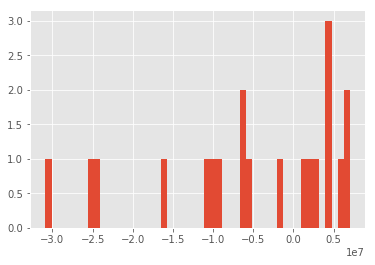

In [32]:
print(np.mean(np.abs(y_test-y_regSVR_pred)))
print("Mean error represents ", round(100*np.mean(np.abs(y_test-y_regSVR_pred))/df_modelize5['INTEGRAL_COSTS'].mean()), "% from the mean value")
plt.hist(y_test-y_regSVR_pred,bins=50);

In [33]:
????????
from sklearn.model_selection import cross_val_score
cross_val_score(regSVR,X_test,y_test,cv=5,scoring="neg_mean_absolute_error").mean()

Object `??????` not found.


C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", Futu

-11323158.3

# Representation

C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


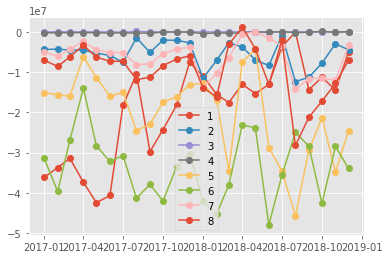

In [34]:
import numpy as np
import matplotlib.pyplot as plt

df_temp = df_modelize5
df_temp['VERSION'] = pd.to_datetime(df_modelize5['VERSION'], format='%Y%m', errors='coerce').dropna()

for i in range(1,9):
    tech = i
    plt.plot(df_temp[df_modelize5['NUM_TECH'] == tech]['VERSION'], df_temp[df_modelize5['NUM_TECH'] == tech]['INTEGRAL_COSTS'], '-o')
    legend(range(1,9))

plt.show(figsize(30,10))

   ID_TECNOLOGIA  NUM_TECH
0             NC         1
3             EB         2
4             BX         3
6             BP         4
8             GN         5
10            CI         6
21            HN         7
27            LN         8


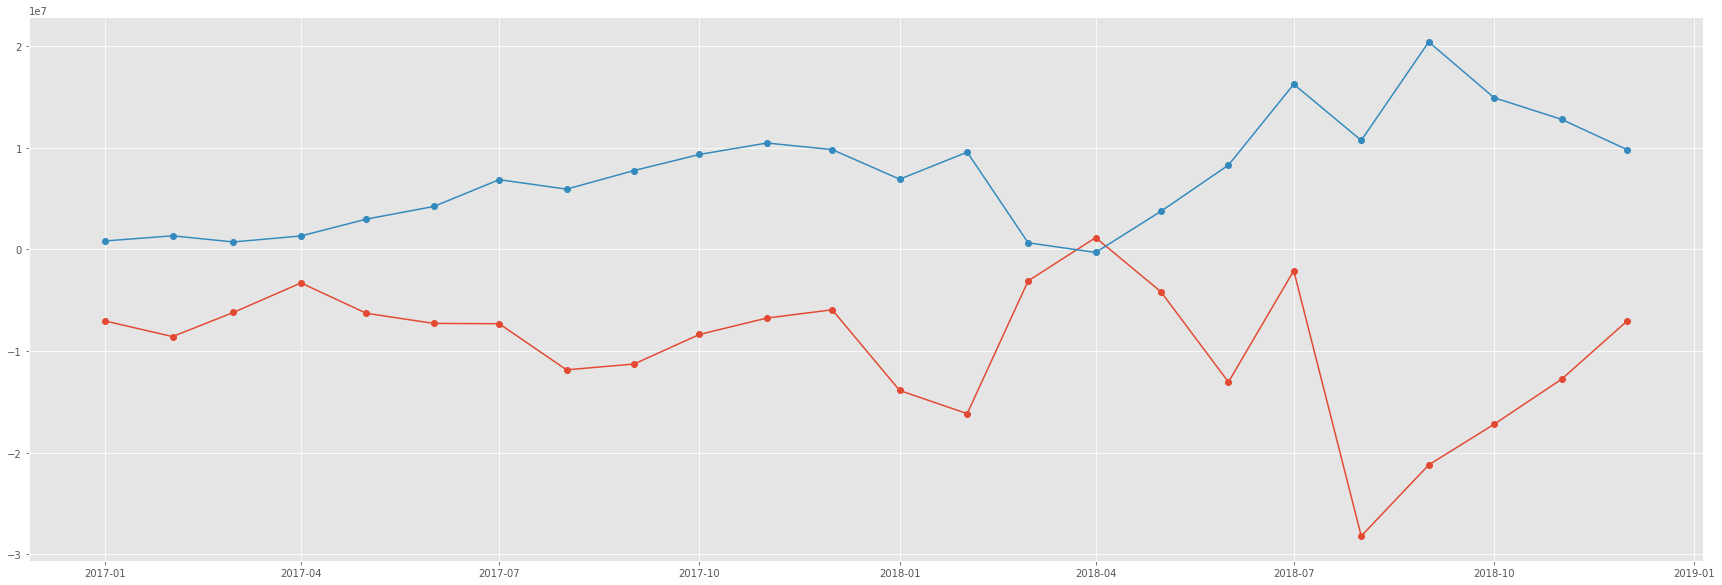

In [35]:
import numpy as np
import matplotlib.pyplot as plt

df_temp = df_modelize5
df_temp['VERSION'] = pd.to_datetime(df_modelize5['VERSION'], format='%Y%m', errors='coerce').dropna()


tech = 8
plt.plot(df_temp[df_modelize5['NUM_TECH'] == tech]['VERSION'], df_temp[df_modelize5['NUM_TECH'] == tech]['INTEGRAL_COSTS'], '-o')
plt.plot(df_temp[df_modelize5['NUM_TECH'] == tech]['VERSION'], df_temp[df_modelize5['NUM_TECH'] == tech]['POWER_MWH'], '-o')
print(df_tech)
plt.show(figsize(30,10))